In [ ]:

# Optimized product pricing in economics involves finding the pricing strategy that maximizes profit or revenue, 
# considering various factors such as costs, demand elasticity, competition, and market conditions. 


<Axes: xlabel='Year', ylabel='Price'>

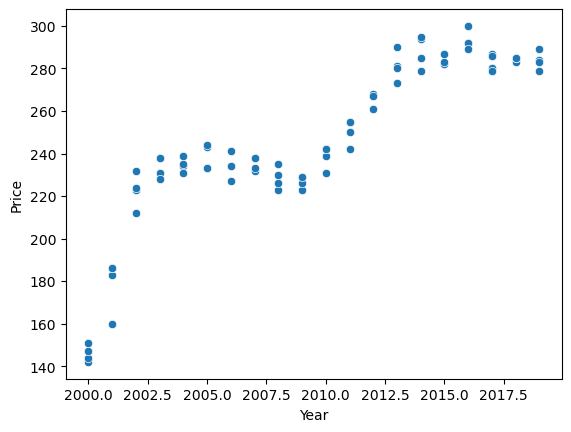

In [2]:

import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns


df = pd.read_csv('C:\\Users\\toys.csv')
df.head(5)


sns.scatterplot(data=df, x="Year", y="Price")


In [3]:

model = ols("Quantity ~ Price", data=df).fit()


Price = list(range(200, 500, 10))
cost = 100
quantity = []
Revenue = []

for i in Price:
    demand = model.params[0] + (model.params[1] * i)
    quantity.append(demand)
    Revenue.append((i-cost) * demand)
 
profit = pd.DataFrame({"Price": Price, "Revenue": Revenue, "Quantity": quantity})
print(profit)


    Price      Revenue   Quantity
0     200  2078.170360  20.781704
1     210  2232.408132  20.294619
2     220  2376.904220  19.807535
3     230  2511.658623  19.320451
4     240  2636.671342  18.833367
5     250  2751.942377  18.346283
6     260  2857.471727  17.859198
7     270  2953.259393  17.372114
8     280  3039.305374  16.885030
9     290  3115.609672  16.397946
10    300  3182.172285  15.910861
11    310  3238.993213  15.423777
12    320  3286.072457  14.936693
13    330  3323.410017  14.449609
14    340  3351.005893  13.962525
15    350  3368.860084  13.475440
16    360  3376.972591  12.988356
17    370  3375.343413  12.501272
18    380  3363.972551  12.014188
19    390  3342.860005  11.527103
20    400  3312.005774  11.040019
21    410  3271.409859  10.552935
22    420  3221.072260  10.065851
23    430  3160.992976   9.578767
24    440  3091.172008   9.091682
25    450  3011.609356   8.604598
26    460  2922.305019   8.117514
27    470  2823.258998   7.630430
28    480  271

<Axes: xlabel='Price', ylabel='Revenue'>

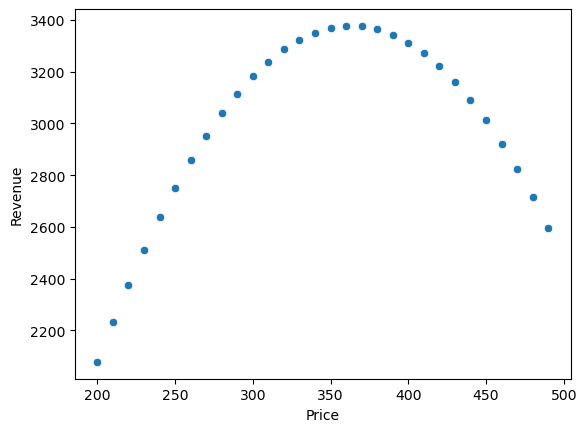

In [4]:

sns.scatterplot(data=profit, x="Price", y="Revenue")


In [5]:

max_val = profit.loc[(profit['Revenue'] == profit['Revenue'].max())]
print(max_val)


    Price      Revenue   Quantity
16    360  3376.972591  12.988356


In [6]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Define the demand function
def demand(price, alpha, beta):
    return alpha - beta * price

# Define the cost function
def cost(quantity, c):
    return c * quantity

# Define the profit function
def profit(price, alpha, beta, quantity, c):
    return (price * demand(price, alpha, beta) - cost(quantity, c))

# Define the objective function to maximize profit
def objective(price, alpha, beta, c):
    quantity = demand(price, alpha, beta)
    return -profit(price, alpha, beta, quantity, c)

# Set the parameters
alpha = 10
beta = 2
c = 1

# Find the optimal price
res = minimize_scalar(objective, args=(alpha, beta, c), bounds=(0, alpha/beta), method='bounded')
optimal_price = res.x
optimal_quantity = demand(optimal_price, alpha, beta)

# Generate the demand, cost, and profit curves
prices = np.linspace(0, alpha/beta, 100)
quantities = demand(prices, alpha, beta)
costs = cost(quantities, c)
profits = profit(prices, alpha, beta, quantities, c)

print(costs)
print(profits)


[10.          9.8989899   9.7979798   9.6969697   9.5959596   9.49494949
  9.39393939  9.29292929  9.19191919  9.09090909  8.98989899  8.88888889
  8.78787879  8.68686869  8.58585859  8.48484848  8.38383838  8.28282828
  8.18181818  8.08080808  7.97979798  7.87878788  7.77777778  7.67676768
  7.57575758  7.47474747  7.37373737  7.27272727  7.17171717  7.07070707
  6.96969697  6.86868687  6.76767677  6.66666667  6.56565657  6.46464646
  6.36363636  6.26262626  6.16161616  6.06060606  5.95959596  5.85858586
  5.75757576  5.65656566  5.55555556  5.45454545  5.35353535  5.25252525
  5.15151515  5.05050505  4.94949495  4.84848485  4.74747475  4.64646465
  4.54545455  4.44444444  4.34343434  4.24242424  4.14141414  4.04040404
  3.93939394  3.83838384  3.73737374  3.63636364  3.53535354  3.43434343
  3.33333333  3.23232323  3.13131313  3.03030303  2.92929293  2.82828283
  2.72727273  2.62626263  2.52525253  2.42424242  2.32323232  2.22222222
  2.12121212  2.02020202  1.91919192  1.81818182  1

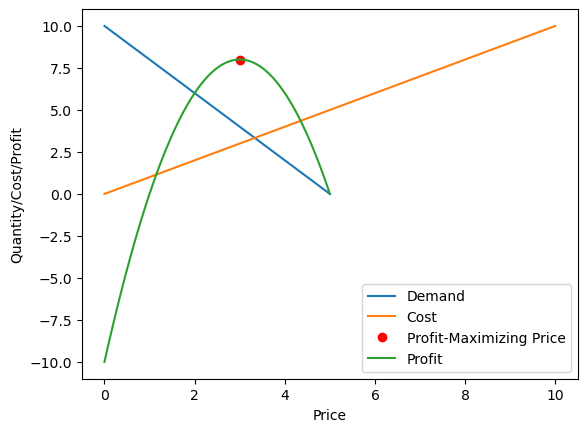

In [7]:

# Plot the demand, cost, and profit curves
plt.plot(prices, quantities, label='Demand')
plt.plot(quantities/c, costs, label='Cost')
plt.plot(optimal_price, profit(optimal_price, alpha, beta, optimal_quantity, c), 'ro', label='Profit-Maximizing Price')
plt.plot(prices, profits, label='Profit')
plt.legend()
plt.xlabel('Price')
plt.ylabel('Quantity/Cost/Profit')
plt.show()


In [ ]:

# In this experiment, we define the demand function, cost function, profit function, and objective function as in the 
# previous example. We then set some example parameter values for the demand and cost functions.

# We use the minimize_scalar function from the scipy.optimize library to find the optimal price and quantity, as before.

# We generate arrays of prices, quantities, costs, and profits using numpy.linspace and the demand, cost, and profit 
# functions. We then plot the demand curve, cost curve, and profit curve using matplotlib.pyplot.plot, and mark the 
# profit-maximizing price with a red dot.

# Finally, we label the axes and add a legend, and display the plot using matplotlib.pyplot.show(). This code can be 
# adapted for different demand and cost functions by changing the values of alpha, beta, and c, and modifying the 
# labels and formatting of the plot.
